Notebook to examined 3.6 test runs

In [1]:
import netCDF4 as nc
import numpy as np
from salishsea_tools import nc_tools
import datetime
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = '/data/nsoontie/MEOPAR/SalishSea/results/2Ddomain/3.6'
directory = 'test_rivers'
file_part = 'SalishSea_4h_20020915_20021012_{}.nc'

dT = nc.Dataset(os.path.join(path,directory,file_part.format('grid_T')))
sal = dT.variables['vosaline'][:]
sal = np.ma.masked_values(sal,0)
deps = dT.variables['deptht'][:]
temp = dT.variables['votemper'][:]
temp = np.ma.masked_values(temp,0)
ssh = dT.variables['sossheig'][:]
n2 = dT.variables['buoy_n2'][:]
n2 = np.ma.masked_values(n2,0)
times = dT.variables['time_counter'][:]
time_origin = datetime.datetime.strptime(dT.variables['time_counter'].time_origin, '%Y-%m-%d %H:%M:%S')

dU = nc.Dataset(os.path.join(path,directory,file_part.format('grid_U')))
U = dU.variables['vozocrtx'][:]
U = np.ma.masked_values(U,0)
depsU=dU.variables['depthu'][:]

dW = nc.Dataset(os.path.join(path,directory,file_part.format('grid_W')))
avt = dW.variables['vert_eddy_diff'][:]
avt = np.ma.masked_values(avt,0)
avm = dW.variables['vert_eddy_visc'][:]
avm = np.ma.masked_values(avm,0)
depsW=dW.variables['depthw'][:]
diss = dW.variables['dissipation'][:]
diss = np.ma.masked_values(diss,0)




#Salinity

<matplotlib.colorbar.Colorbar instance at 0x7ff6b22232d8>

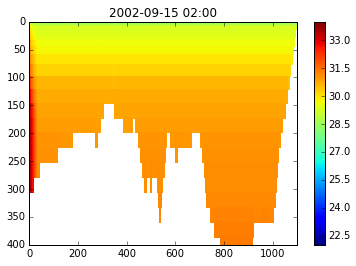

In [3]:
smin=22
smax=34
t=0
y=3
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))
plt.colorbar()

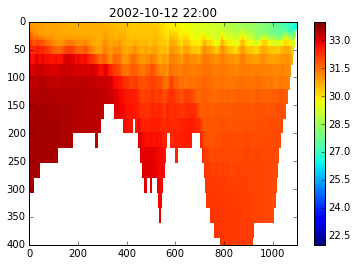

In [4]:
t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

winds stress still too strong? Surface layer is quite deep.

#Temperature

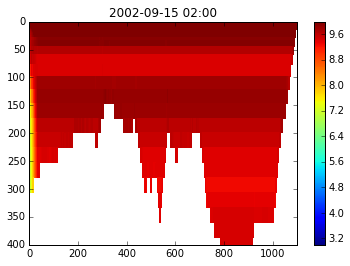

In [5]:
tmin=3; tmax=10
t=0
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

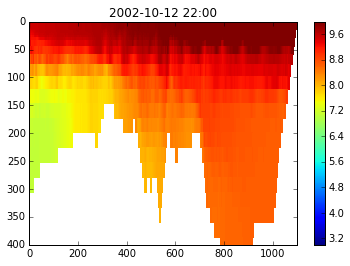

In [6]:

t=-1
plt.pcolormesh(np.arange(0,sal.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

May want to be more careful about how the water temperature of the river is specified. 

# U

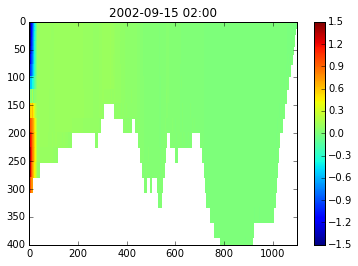

In [7]:
t=0
umin=-1.5
umax=1.5
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

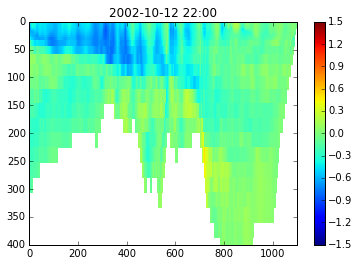

In [8]:
t=-1
plt.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin,vmax=umax)
plt.axis([0,1100,400,0])
plt.colorbar()
date =time_origin + datetime.timedelta(seconds = times[t])
plt.title(date.strftime('%Y-%m-%d %H:%M'))

#SSH and tides

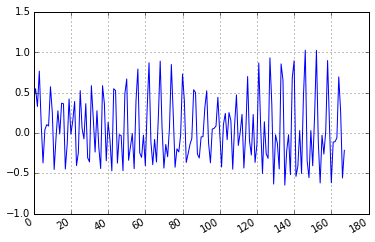

In [9]:
dates = [time_origin + datetime.timedelta(seconds= t) for t in times]
plt.plot(ssh[:,y,10])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

Spring tides at t=60-70, 145-155

Amphidrome?

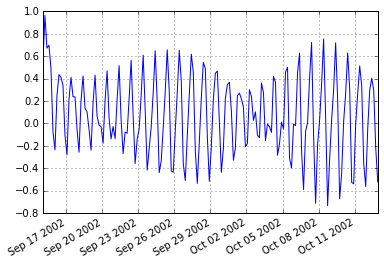

In [10]:
plt.plot(dates,ssh[:,y,150])
fig=plt.gcf()
fig.autofmt_xdate()
plt.grid()

Yes, it looks like the tidal signal is mainly diurnal here at x=150.

<matplotlib.colorbar.Colorbar instance at 0x7ff6ab01b050>

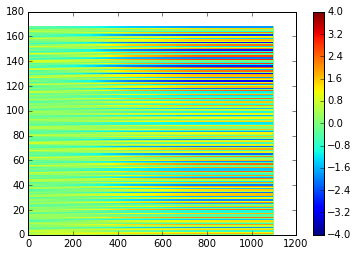

In [11]:
plt.pcolormesh(ssh[:,y,:],vmin=-4,vmax=4)
plt.colorbar()

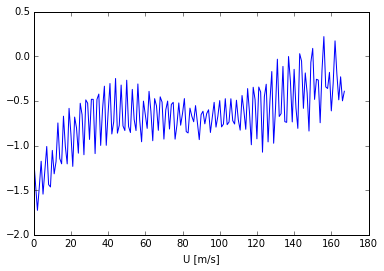

In [12]:
plt.plot(U[:,0,y,10])
plt.xlabel('U [m/s]')

In [13]:
print U.max()
print U.min()

1.52041
-3.05095


<matplotlib.colorbar.Colorbar instance at 0x7ff6aadbf638>

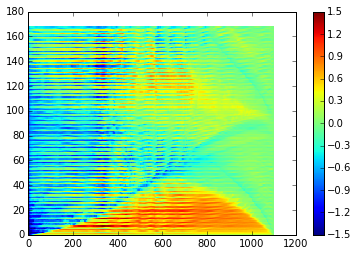

In [14]:
plt.pcolormesh(U[:,0,y,:],vmin=-1.5,vmax=1.5)
plt.colorbar()

#Plot at a time

In [15]:
def plot_variables(t):
    """Plot salinity, temperature, vertical eddy viscosity, vertical eddy diffusivity,
    buoyancy frequency, and U velocity at a chosen time. 
    
    t is an integer for model output index"""
    date =time_origin + datetime.timedelta(seconds = times[t])
    print date.strftime('%Y-%m-%d %H:%M')
    fig,axs = plt.subplots(3,2,figsize= (10,10))

    #salnity
    ax=axs[0,0]
    mesh=ax.pcolormesh(np.arange(0,sal.shape[3]),deps,sal[t,:,y,:],vmin=smin,vmax=smax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Salinity')

    #temp
    ax=axs[0,1]
    mesh=ax.pcolormesh(np.arange(0,temp.shape[3]),deps,temp[t,:,y,:],vmin=tmin,vmax=tmax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Temperature')

    #diff
    dmin=0; dmax=100
    ax=axs[1,1]
    mesh=ax.pcolormesh(np.arange(0,avt.shape[3]),depsW,avt[t,:,y,:],vmin=dmin, vmax=dmax, cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy diff')

    #visct
    ax=axs[1,0]
    mesh=ax.pcolormesh(np.arange(0,avm.shape[3]),depsW,avm[t,:,y,:],vmin=dmin, vmax=dmax,cmap='hot')
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Vertical eddy visc')

    #n2
    nmin=0; nmax=0.005
    ax=axs[2,0]
    mesh=ax.pcolormesh(np.arange(0,n2.shape[3]),deps,n2[t,:,y,:],vmin=nmin, vmax=nmax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('Squared buoyancy frequency')

    #U
    ax=axs[2,1]
    mesh=ax.pcolormesh(np.arange(0,U.shape[3]),depsU,U[t,:,y,:],vmin=umin, vmax=umax)
    ax.set_ylim([400,0])
    ax.set_xlim([0,1100])
    plt.colorbar(mesh,ax=ax)
    ax.set_title('U')
    
    return fig

Spring tide

2002-09-26 06:00


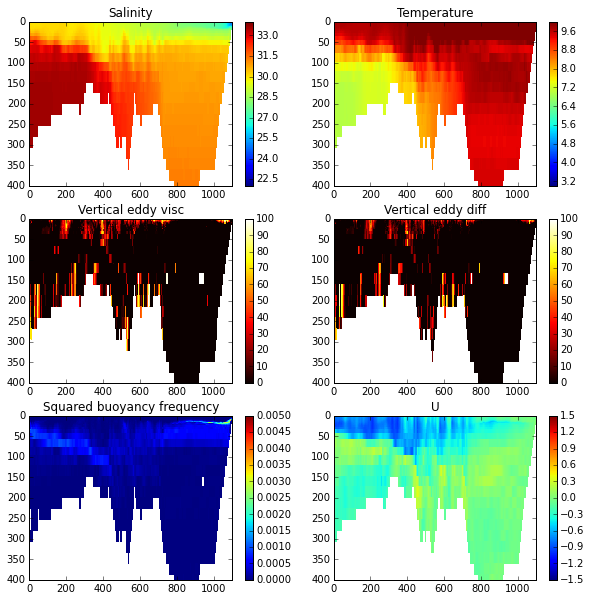

In [16]:
fig = plot_variables(67)

2002-09-26 10:00


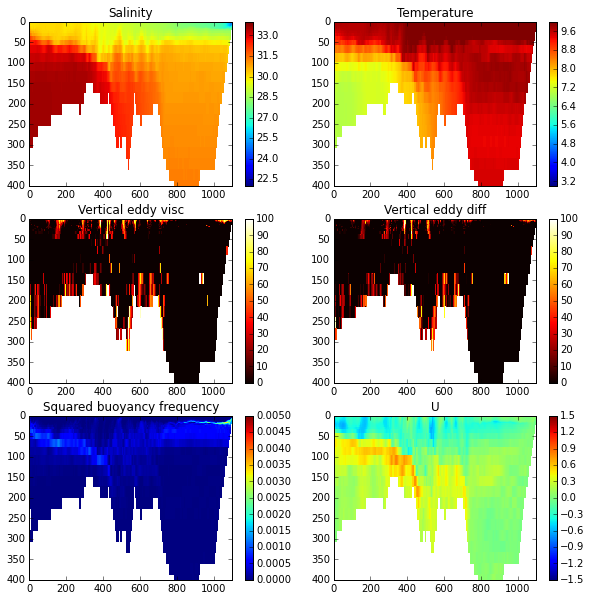

In [17]:
fig = plot_variables(68)

Still not a lot of mixing over the sill. Is it too stratified? Is my second sill large enough?

Second spring

2002-10-06 14:00


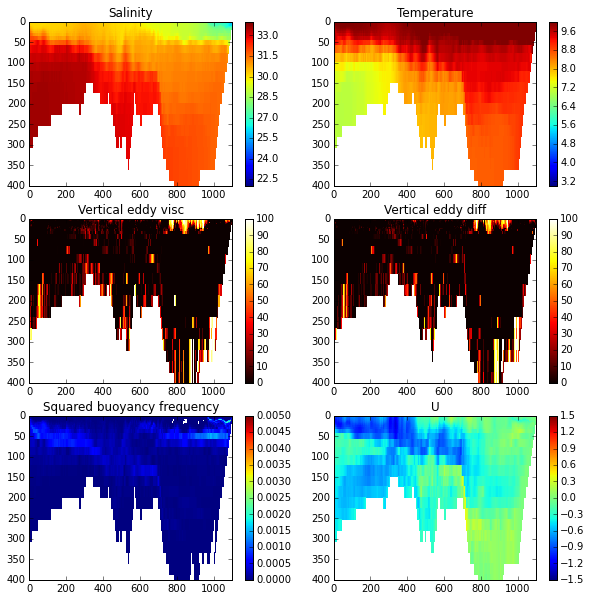

In [18]:
fig = plot_variables(129)

Might need to be careful when masking the buoyancy frequency

In [19]:
np.nanmax(avm)

100.0003

Neap

2002-10-03 10:00


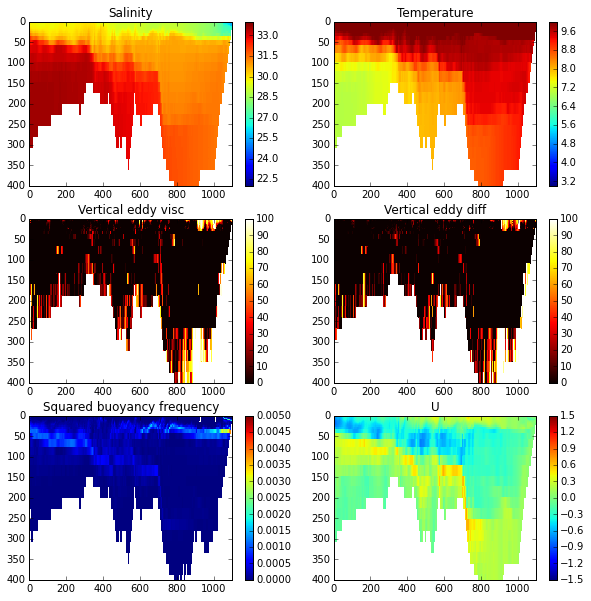

In [20]:
fig = plot_variables(110)

#Depth and thickness of cells

In [21]:
print dT

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    name: SalishSea_4h_20020915_20021012
    description: ocean T grid variables
    conventions: CF-1.1
    production: An IPSL model
    timeStamp: 2015-Aug-17 17:15:07 PDT
    dimensions(sizes): x(1100), y(10), deptht(40), time_counter(168), time_bounds(2)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 deptht(deptht), float32 sossheig(time_counter,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,time_bounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,time_bounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x), float32 buoy_n2(time_counter,deptht,y,x), float32 T-depth_vvl(time_counter,deptht,y,x), float32 T-thick_vvl(time_counter,deptht,y,x)
    groups: 



In [22]:
Tdep = dT.variables['T-depth_vvl']
Tthick = dT.variables['T-thick_vvl']

[1000, 1100, 30, 0]

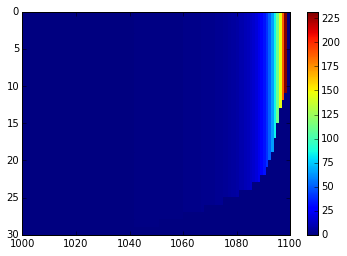

In [23]:
t=75
plt.pcolormesh(Tthick[t,:,y,:])
plt.colorbar()
plt.axis([1000,1100,30,0])

This is showing the deformation of the T grid cell thickness due to the vvl scheme. At the far right, the cells are deformed the most. I think this is where the ssh amlpitudes are highest. 

In [24]:
print Tthick

<type 'netCDF4._netCDF4.Variable'>
float32 T-thick_vvl(time_counter, deptht, y, x)
    long_name: T-cell thickness deformation
    units: %
    online_operation: average
    interval_operation: 40s
    interval_write: 4h
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (168, 40, 10, 1100)
filling on


Cell depths - accounting for partial steps (I think)

[0, 1100, 40, 25]

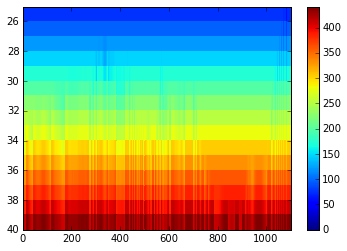

In [25]:
t=120
plt.pcolormesh(Tdep[t,:,y,:])
plt.colorbar()
plt.axis([0,1100,40,25])

How do these changes compare with the depth recorded in the depths variable?

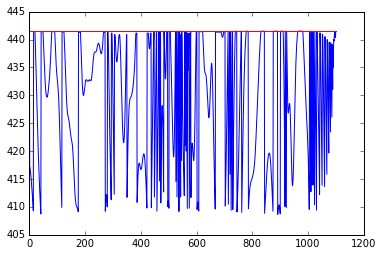

In [26]:
plt.plot(Tdep[t,-1,y,:])
plt.plot([0,1100],[deps[-1],deps[-1]], 'r-')

So there can be as much as a 30m difference between the bottom depth and the partial cell depth. How does that work? The grid spacing is ~27 m...

In [27]:
print Tdep

<type 'netCDF4._netCDF4.Variable'>
float32 T-depth_vvl(time_counter, deptht, y, x)
    long_name: T-point depth
    units: m
    online_operation: average
    interval_operation: 40s
    interval_write: 4h
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (168, 40, 10, 1100)
filling on


grid spacing

In [28]:
print deps[1:]-deps[:-1]

[  1.00000286   1.00000834   1.00001907   1.00004005   1.00008011
   1.00015974   1.00031281   1.00061274   1.00119686   1.00233269
   1.00454617   1.00885487   1.01724529   1.03357029   1.06530571
   1.12688541   1.24596214   1.47464943   1.90819359   2.71027756
   4.12965965   6.45584106   9.8319664   13.96660995  18.10125351
  21.47737122  23.80355835  25.22294617  26.02502441  26.45855713
  26.68725586  26.80633545  26.86790466  26.8996582   26.91598511
  26.92434692  26.92868042  26.93087769  26.93200684]


#Buoyancy frequency

Develop some code for analyzing stratification.

Goal: Define a Froude number to compare with 3D case. Trying to figure out how I can make the dynamics of my 2D case more like the 3D. 

Ultimately I will need density and currents and will need to relate these to the input somehow.


In [29]:
print np.max(n2)
print np.unravel_index(np.argmax(n2), n2.shape)

0.0549841
(0, 1, 5, 30)


Boundary forcing makes a strong density gradient near the start of the simulation.

In [30]:
print np.min(n2)
print np.unravel_index(np.argmin(n2), n2.shape)

-0.000289126
(1, 1, 6, 4)


Unstable stratification